# Домашнее задание "Продвинутая оптимизация"

## Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [113]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [114]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

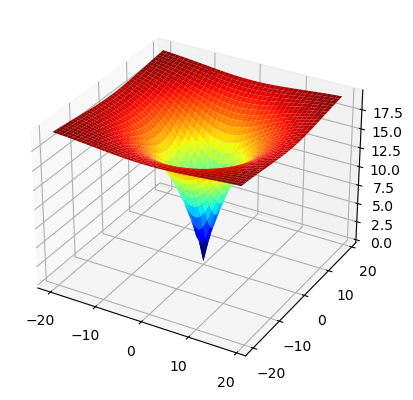

In [37]:
# визуализация
axis = figure.add_subplot(111, projection='3d')

X = np.arange(-20, 20, 1.)
Y = np.arange(-20, 20, 1.)
X, Y = np.meshgrid(X, Y)
Z = ackley(np.array([X,Y]))

figure = plt.figure()

axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(X, Y, Z, cmap='jet', shade= "false")
plt.show()

In [38]:
bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

Метод дифференциальной эволюции без дополнительных параметров успешно нашел глобальный минимум функции: 
- количество оценок - 2793
- количество итераций - 90

### Посмотрим, какая из стратегий наиболее эффективна в данном случае (strategy):

In [129]:
strat = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp',
            'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin',
            'rand2bin', 'rand1bin']

In [49]:
for i in range(len(strat)):
    result = differential_evolution(ackley, bounds, strategy=strat[i], seed=42)
    print(i + 1, strat[i], ':', result.message, result.nfev, result.nit)
print('Done!')

1 best1bin : Optimization terminated successfully. 2793 90
2 best1exp : Optimization terminated successfully. 4503 147
3 rand1exp : Optimization terminated successfully. 7473 246
4 randtobest1exp : Optimization terminated successfully. 4773 156
5 currenttobest1exp : Maximum number of iterations has been exceeded. 30093 1000
6 best2exp : Optimization terminated successfully. 7413 244
7 rand2exp : Optimization terminated successfully. 10323 341
8 randtobest1bin : Optimization terminated successfully. 3123 101
9 currenttobest1bin : Maximum number of iterations has been exceeded. 30093 1000
10 best2bin : Optimization terminated successfully. 5073 166
11 rand2bin : Optimization terminated successfully. 7053 232
12 rand1bin : Optimization terminated successfully. 5133 168
Done!


In [130]:
nits = [differential_evolution(ackley, bounds, strategy=strat[i], seed=42).nit for i in range(len(strat))]
nits

[90, 147, 246, 156, 1000, 244, 341, 101, 1000, 166, 232, 168]

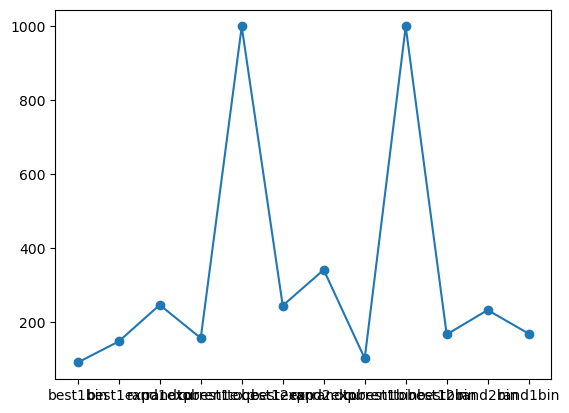

In [131]:
plt.plot(strat, nits)
plt.scatter(strat, nits)
plt.show() 

Самая быстрая стратегия - **best1bin** (стратегия по умолчанию); на втором месте - **randtobest1bin**.

Стратегии *currenttobest1exp* и *currenttobest1bin* не справились вовсе


### Оценим влияние множителя общей часленности (popsize)

In [115]:
pops = [np.random.randint(1, 100) for i in range(12)]
pops.sort()
pops

[6, 8, 11, 14, 26, 43, 47, 48, 63, 77, 82, 85]

In [117]:
for i in range(len(pops)):
    result = differential_evolution(ackley, bounds, strategy='best1bin', popsize=pops[i], seed=42)
    print(i + 1, pops[i], ':', result.message, result.nfev, result.nit, result.x)
print('Done!')

1 6 : Optimization terminated successfully. 1263 99 [0. 0.]
2 8 : Optimization terminated successfully. 1631 97 [0. 0.]
3 11 : Optimization terminated successfully. 2043 89 [0. 0.]
4 14 : Optimization terminated successfully. 2863 99 [0. 0.]
5 26 : Optimization terminated successfully. 4951 93 [0. 0.]
6 43 : Optimization terminated successfully. 8405 96 [0. 0.]
7 47 : Optimization terminated successfully. 9181 96 [0. 0.]
8 48 : Optimization terminated successfully. 9183 94 [0. 0.]
9 63 : Optimization terminated successfully. 12411 97 [0. 0.]
10 77 : Optimization terminated successfully. 14847 95 [0. 0.]
11 82 : Optimization terminated successfully. 17283 104 [0. 0.]
12 85 : Optimization terminated successfully. 17063 99 [0. 0.]
Done!


In [121]:
nits = [differential_evolution(ackley, bounds, strategy='best1bin', popsize=pops[i], seed=42).nit for i in range(len(pops))]
nits

[99, 97, 89, 99, 93, 96, 96, 94, 97, 95, 104, 99]

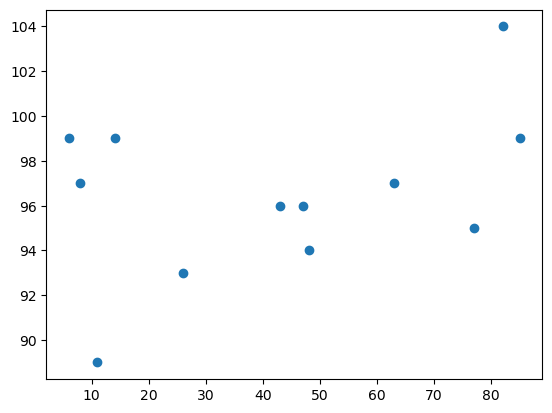

In [123]:
plt.scatter(pops, nits)
plt.show() 

Этот параметр существенно влияет на скорость оптимизации. Чем больше популяция, тем дольше обрабатываются данные, растет число количества оценок, а на колличестве итераций почти не сказывается.

### Оценим влияние константы мутации (дифференциальный вес)

In [124]:
muts = np.random.uniform(low=0.0, high=2, size=(12,))
muts.sort()
muts

array([0.63405468, 0.89099076, 0.92824965, 1.35862551, 1.39538419,
       1.48571794, 1.59575834, 1.76784173, 1.79851355, 1.82655815,
       1.85232251, 1.90553084])

In [110]:
for i in range(len(muts)):
    result = differential_evolution(ackley, bounds, strategy='best1bin', mutation=muts[i], seed=42)
    print(i + 1, muts[i], ':', result.message, result.nfev, result.nit, result.x)
print('Done!')

1 0.6173575579126964 : Optimization terminated successfully. 2403 77 [0. 0.]
2 0.6315653829705747 : Optimization terminated successfully. 2493 80 [0. 0.]
3 0.7901653016962924 : Optimization terminated successfully. 3453 112 [0. 0.]
4 0.7999669535650689 : Optimization terminated successfully. 3543 115 [0. 0.]
5 0.8104535254854719 : Optimization terminated successfully. 3573 116 [0. 0.]
6 0.9101234907357456 : Optimization terminated successfully. 4143 135 [0. 0.]
7 1.3023572972671962 : Optimization terminated successfully. 6453 212 [0. 0.]
8 1.3155498611129242 : Optimization terminated successfully. 7143 235 [0. 0.]
9 1.3330660789348412 : Optimization terminated successfully. 7803 257 [0. 0.]
10 1.5123707556331265 : Optimization terminated successfully. 2856 91 [-5.00089618e-09 -5.72549940e-11]
11 1.9395172813026225 : Optimization terminated successfully. 2358 74 [-1.97529396e-09  7.80461448e-10]
12 1.970297744460227 : Optimization terminated successfully. 5523 178 [1.47941726e-08 3.7305

In [125]:
nits = [differential_evolution(ackley, bounds, strategy='best1bin', mutation=muts[i], seed=42).nit for i in range(len(pops))]
nits

[77, 137, 142, 242, 260, 288, 318, 153, 180, 368, 384, 399]

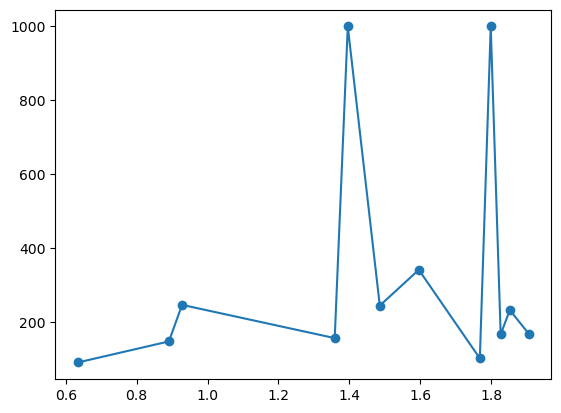

In [132]:
plt.scatter(muts, nits)
plt.plot(muts, nits)
plt.show() 

Зависимость дифференциального веса и количества итераций прямопропорциаонально, однако рядом со значением 1.8 находится локальный минимум графика

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [158]:
from scipy.optimize import minimize

x0 = np.array([0., 0.])

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [163]:
result_m = minimize(ackley, x0,  method='Nelder-Mead', tol=0.0001)
result_m

 final_simplex: (array([[ 1.14809988e-05,  1.75089121e-05],
       [-2.28096150e-05, -8.22792620e-06],
       [ 1.64806946e-05, -4.82673799e-05]]), array([5.92316251e-05, 6.86000461e-05, 1.44328849e-04]))
           fun: 5.9231625052280634e-05
       message: 'Optimization terminated successfully.'
          nfev: 95
           nit: 49
        status: 0
       success: True
             x: array([1.14809988e-05, 1.75089121e-05])

In [164]:
result_m = minimize(ackley, x0,  method='Nelder-Mead', tol=0.0000001)
result_m

 final_simplex: (array([[ 4.64677288e-12, -3.05492323e-08],
       [-3.13568603e-08, -1.00328650e-08],
       [ 5.08034802e-10,  4.16223331e-08]]), array([8.64063030e-08, 9.31197843e-08, 1.17734551e-07]))
           fun: 8.64063030014961e-08
       message: 'Optimization terminated successfully.'
          nfev: 139
           nit: 71
        status: 0
       success: True
             x: array([ 4.64677288e-12, -3.05492323e-08])

In [170]:
result_p = minimize(ackley, x0,  method='Powell')
print(result_p.nit, result_p.x)

4 [-3.82065165e-12  4.63520136e-12]


In [167]:
result_t = minimize(ackley, x0,  method='trust-constr')
print(result_t.nit, result_t.x)

47 [-7.06202327e-10 -7.06202327e-10]


Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
